In [419]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xg
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.metrics import mean_absolute_error 
from xgboost import plot_tree
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [420]:
spend_df = pd.read_csv("spenddata.csv", index_col=0)
test_df = pd.read_csv("testdata.csv", index_col=0)

In [421]:
print('\nNumber of rows and columns in the data set: ',spend_df.shape)
print('')

#Lets look into top few rows and columns in the dataset
spend_df.head()


Number of rows and columns in the data set:  (18379, 300)



,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
1,1,2.0,NaN,1,5,1,57,34,1,NaN,...,1,0,0,0,1,0,0,0,5.0,NaN
2,1,2.0,NaN,1,4,1,57,34,2,3.0,...,0,0,0,0,0,0,1,0,NaN,NaN
3,1,2.0,NaN,1,5,1,57,42,2,1.0,...,0,0,0,0,0,0,0,0,3.0,NaN
4,1,2.0,NaN,1,6,1,57,34,2,4.0,...,0,0,0,0,1,0,1,0,5.0,NaN
5,1,2.0,NaN,1,8,1,22,1,1,NaN,...,0,0,0,0,0,0,0,0,5.0,NaN


In [422]:
spend_df.describe()

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
count,18379.000000,14370.000000,1899.00000,18379.0,18379.000000,18379.0,18379.000000,18379.000000,18379.000000,10300.000000,...,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,13961.000000,0.0
mean,6.504054,1.967780,2.38020,1.0,6.339681,1.0,56.685130,25.217966,1.560422,2.224272,...,0.330595,0.098373,0.047718,0.070842,0.142336,0.038359,0.070352,0.017683,3.038536,NaN
std,3.468736,0.845175,0.81202,0.0,2.450582,0.0,36.091902,10.631883,0.496349,1.187530,...,0.470440,0.297827,0.213174,0.256567,0.349404,0.192067,0.255746,0.131801,1.247728,NaN
min,1.000000,1.000000,1.00000,1.0,1.000000,1.0,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4.000000,1.000000,2.00000,1.0,4.000000,1.0,25.000000,20.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
50%,7.000000,2.000000,2.00000,1.0,6.000000,1.0,57.000000,24.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN
75%,9.000000,3.000000,3.00000,1.0,8.000000,1.0,65.000000,30.000000,2.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,NaN
max,12.000000,3.000000,4.00000,1.0,12.000000,1.0,137.000000,50.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,NaN


## Missing Value Removal/Imputation

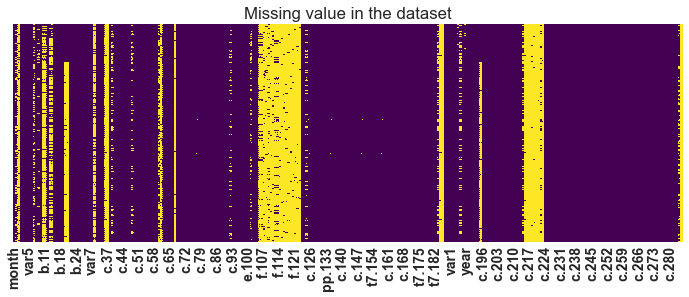

In [423]:
plt.figure(figsize=(12,4))
sns.heatmap(spend_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [424]:
na_limit = len(spend_df) * .70
spend_df.dropna(thresh=na_limit, axis=1, inplace=True)

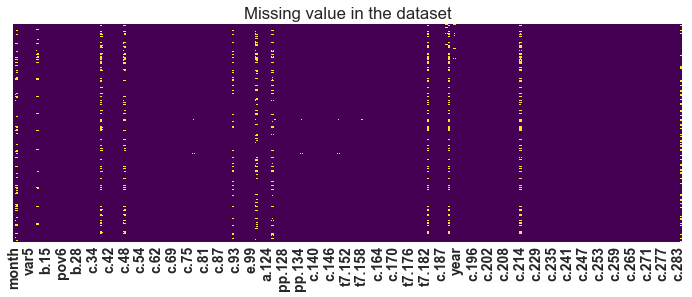

In [425]:
plt.figure(figsize=(12,4))
sns.heatmap(spend_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [426]:
spend_df.fillna(spend_df.mean(), inplace=True)

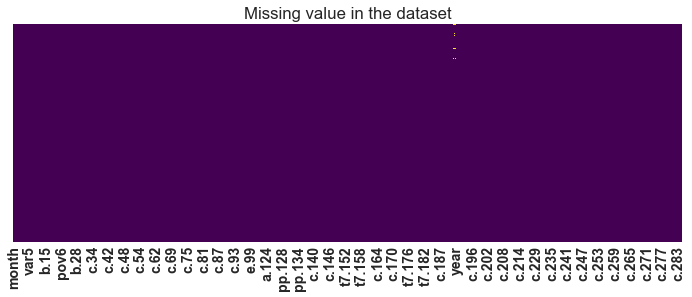

In [427]:
plt.figure(figsize=(12,4))
sns.heatmap(spend_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [428]:
spend_df.dropna(axis=1, inplace=True)

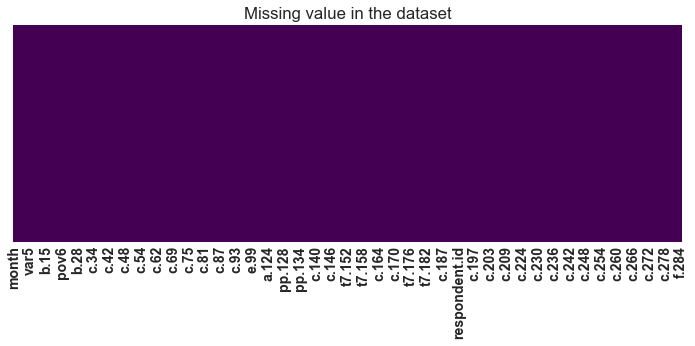

In [429]:
plt.figure(figsize=(12,4))
sns.heatmap(spend_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [430]:
print('\nNumber of rows and columns in the data set: ',spend_df.shape)
print('')


Number of rows and columns in the data set:  (18379, 253)



## Encoding Categorical Variable(s)

In [431]:
# Categorical boolean mask
categorical_feature_mask = spend_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = spend_df.columns[categorical_feature_mask].tolist()
categorical_cols

['respondent.id']

In [432]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

spend_df[categorical_cols] = spend_df[categorical_cols].apply(lambda col: le.fit_transform(col))
test_df[categorical_cols] = spend_df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [433]:
spend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18379 entries, 1 to 22974
Columns: 253 entries, month to f.284
dtypes: float64(88), int32(1), int64(164)
memory usage: 36.0 MB


## Train Val Split

In [434]:
X_train, X_val, y_train, y_val = train_test_split(
    spend_df.drop(labels=['totshopping.rep'], axis=1),
    spend_df['totshopping.rep'],
    test_size=0.3,
    random_state=0)

y_test = test_df['totshopping.rep']
X_test = test_df.drop(labels=['totshopping.rep'], axis=1)

X_train.shape, X_test.shape

((12865, 252), (4595, 298))

## Removing Constant Features

In [435]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0):
    constant_filter = VarianceThreshold(threshold)
    constant_filter.fit(data)
    len(X_train.columns[constant_filter.get_support()])
    constant_columns = [column for column in X_train.columns
                        if column not in X_train.columns[constant_filter.get_support()]]
    for column in constant_columns:
        print(column)
    return data.columns[constant_filter.get_support(indices=True)]

In [436]:
non_constant_cols = variance_threshold_selector(X_train)

a.1
a.3
c.45
c.64
year
c.261
c.264


In [437]:
X_train = X_train[non_constant_cols]
X_val = X_val[non_constant_cols]
X_test = X_test[non_constant_cols]

## Removing Duplicated Features

In [438]:
X_train_T = X_train.T

In [439]:
print(X_train_T.duplicated().sum())

14


In [440]:
unique_features = X_train_T.drop_duplicates(keep='first').T.columns
unique_features

Index(['month', 'var8', 'a.2', 'a.4', 'var5', 'b.5', 'b.7', 'b.8', 'b.9',
       'b.12',
       ...
       'c.275', 'c.276', 'c.277', 'c.278', 'c.279', 'c.280', 'c.281', 'c.282',
       'c.283', 'f.284'],
      dtype='object', length=231)

In [441]:
duplicated_features = [dup_col for dup_col in X_train.columns if dup_col not in unique_features]
duplicated_features

['c.59',
 'var4',
 't7.149',
 't7.150',
 't7.151',
 't7.153',
 't7.155',
 't7.173',
 't7.174',
 't7.175',
 't7.177',
 't7.178',
 't7.179',
 'c.263']

In [442]:
X_train = X_train[unique_features]
X_val = X_val[unique_features]
X_test = X_test[unique_features]

## Remove Correlated Features

In [443]:
correlated_features = set()
correlation_matrix = X_train.corr()

In [444]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [445]:
len(correlated_features)

51

In [446]:
print(correlated_features)

{'t7.181', 'c.144', 't7.180', 'b.18', 'var0', 'c.66', 't7.176', 'c.142', 'c.224', 'c.143', 'b.17', 'e.96', 'b.19', 'c.47', 'c.40', 'c.136', 'c.125', 'c.137', 'c.32', 'c.248', 'c.138', 'c.229', 'b.192', 'c.135', 'e.100', 'c.262', 'c.139', 'c.145', 't7.156', 'c.189', 'var1', 'f.188', 'c.76', 'c.208', 'c.127', 'c.169', 'c.30', 'c.57', 't7.157', 'c.147', 'e.97', 'c.148', 'c.146', 'c.141', 't7.154', 't7.158', 'b.16', 'var2', 'c.75', 'c.140', 't7.152'}


In [447]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_val.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

## Scaling

In [448]:
scaler = StandardScaler()
X_train.loc[:] = scaler.fit_transform(X_train.loc[:])
X_val.loc[:] = scaler.transform(X_val.loc[:])
X_test.loc[:] = scaler.transform(X_test.loc[:])

In [449]:
X_train.head()

,month,var8,a.2,a.4,var5,b.5,b.7,b.8,b.9,b.12,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
19234,1.021562,0.046960,1.903533,0.037432,-0.488701,0.884785,-0.309298,-0.667857,0.384767,0.757303,...,-0.157912,-0.697564,-0.330953,4.505515,3.626695,-0.408396,-0.201507,-0.272126,-0.132814,0.865950
6687,-0.709675,0.046960,1.083929,-1.017403,-0.206230,-1.130219,-0.309298,-0.667857,0.384767,-1.320475,...,-0.157912,-0.697564,-0.330953,-0.221950,-0.275733,-0.408396,-0.201507,-0.272126,-0.132814,-0.015129
15038,0.444483,0.046960,1.083929,1.786237,-0.865328,0.884785,-0.309298,-0.667857,0.384767,0.757303,...,-0.157912,-0.697564,-0.330953,-0.221950,-0.275733,-0.408396,4.962609,-0.272126,-0.132814,0.865950
5107,-0.998214,0.046960,2.313336,1.786237,-0.865328,0.884785,-0.309298,-0.667857,0.384767,-1.320475,...,-0.157912,-0.697564,-0.330953,-0.221950,-0.275733,-0.408396,-0.201507,-0.272126,-0.132814,-0.015129
5779,-0.709675,0.003888,0.674127,0.037432,-0.488701,0.884785,3.632373,-0.003467,0.384767,0.757303,...,-0.157912,-0.697564,-0.330953,4.505515,3.626695,-0.408396,4.962609,-0.272126,7.529315,-0.966835


In [450]:
X_test.head()

,month,var8,a.2,a.4,var5,b.5,b.7,b.8,b.9,b.12,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
9,-1.575293,-1.289846,1.903533,-0.267915,-1.618582,0.884785,-0.309298,-0.667857,-2.598975,-1.320475,...,-0.157912,-0.697564,-0.330953,-0.22195,-0.275733,-0.408396,-0.201507,3.674772,-0.132814,-0.050443
15,-1.575293,0.046960,1.903533,0.231743,0.170397,-1.130219,-0.309298,-0.667857,0.384767,0.757303,...,-0.157912,1.433560,-0.330953,-0.22195,-0.275733,-0.408396,-0.201507,-0.272126,-0.132814,-0.050443
16,-1.575293,0.046960,-0.145477,0.231743,0.170397,0.884785,-0.309298,-0.667857,0.384767,0.757303,...,-0.157912,-0.697564,-0.330953,-0.22195,-0.275733,-0.408396,-0.201507,3.674772,-0.132814,-0.050443
24,-1.575293,-1.289846,-1.374884,-1.489303,-2.183523,-1.130219,-0.309298,-0.667857,-2.598975,-1.320475,...,-0.157912,-0.697564,-0.330953,-0.22195,-0.275733,-0.408396,-0.201507,-0.272126,-0.132814,NaN
32,-1.575293,-1.289846,-0.555280,0.731402,-2.089366,-1.130219,-0.309298,1.684232,-2.598975,-1.320475,...,-0.157912,1.433560,-0.330953,-0.22195,-0.275733,2.448602,-0.201507,-0.272126,-0.132814,NaN


## Feature Selection

In [451]:
#import libraries
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
#Fit the model
clf = LassoCV().fit(X_train, y_train)
#Selected features
importance = np.abs(clf.coef_)
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01
idx_features = (-importance).argsort()[:10]
name_features = np.array(X_train.columns)[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['c.77' 'c.92' 'a.186' 'c.74' 'b.191' 'c.50' 't7.182' 'c.159' 'pp.128'
 'c.83']


## Build and Compare Models

In [382]:
pipelines = []
pipelines.append(('LR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('LASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('EN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('KNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('CART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('GBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('RF', Pipeline([('RF', RandomForestRegressor())])))
pipelines.append(('XGB', Pipeline([('XGB', xg.XGBRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train[name_features], y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -38575.922635 (12274.708043)
LASSO: -38587.297093 (12319.161895)
EN: -50128.221136 (9860.352024)
KNN: -16610.004265 (5602.524468)
CART: -3059.499802 (2833.788599)
GBM: -1991.987292 (1972.343371)
RF: -3143.748687 (3429.445024)
XGB: -1680.137361 (1989.533559)


In [450]:
NN_model = Sequential()
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train[name_features].shape[1], activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)             

In [451]:
checkpoint_name = 'nn_models/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
cp = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
callbacks_list = [cp]

In [452]:
history = NN_model.fit(X_train[name_features], y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 10292 samples, validate on 2573 samples
Epoch 1/500
10292/10292 [==============================] - 5s 442us/step - loss: 103.3043 - mean_absolute_error: 103.3043 - val_loss: 39.3633 - val_mean_absolute_error: 39.3633

Epoch 00001: val_loss improved from inf to 39.36334, saving model to nn_models/Weights-001--39.36334.hdf5
Epoch 2/500
10292/10292 [==============================] - 3s 300us/step - loss: 48.2033 - mean_absolute_error: 48.2033 - val_loss: 27.9410 - val_mean_absolute_error: 27.9410

Epoch 00002: val_loss improved from 39.36334 to 27.94097, saving model to nn_models/Weights-002--27.94097.hdf5
Epoch 3/500
10292/10292 [==============================] - 3s 276us/step - loss: 41.8572 - mean_absolute_error: 41.8572 - val_loss: 30.5961 - val_mean_absolute_error: 30.5961

Epoch 00003: val_loss did not improve from 27.94097
Epoch 4/500
10292/10292 [==============================] - 3s 287us/step - loss: 39.5448 - mean_absolute_error: 39.5448 - val_loss: 25.5911 - val_mean_a

10292/10292 [==============================] - 3s 300us/step - loss: 28.7723 - mean_absolute_error: 28.7724 - val_loss: 16.6935 - val_mean_absolute_error: 16.6935

Epoch 00034: val_loss did not improve from 11.45377
Epoch 35/500
10292/10292 [==============================] - 3s 289us/step - loss: 28.2908 - mean_absolute_error: 28.2908 - val_loss: 19.4937 - val_mean_absolute_error: 19.4937

Epoch 00035: val_loss did not improve from 11.45377
Epoch 36/500
10292/10292 [==============================] - 3s 278us/step - loss: 27.6159 - mean_absolute_error: 27.6159 - val_loss: 16.6499 - val_mean_absolute_error: 16.6499

Epoch 00036: val_loss did not improve from 11.45377
Epoch 37/500
10292/10292 [==============================] - 3s 282us/step - loss: 28.4884 - mean_absolute_error: 28.4884 - val_loss: 23.0481 - val_mean_absolute_error: 23.0481

Epoch 00037: val_loss did not improve from 11.45377
Epoch 38/500
10292/10292 [==============================] - 3s 282us/step - loss: 28.5573 - mean_


Epoch 00069: val_loss did not improve from 10.72280
Epoch 70/500
10292/10292 [==============================] - 3s 283us/step - loss: 25.6809 - mean_absolute_error: 25.6809 - val_loss: 11.4168 - val_mean_absolute_error: 11.4168

Epoch 00070: val_loss did not improve from 10.72280
Epoch 71/500
10292/10292 [==============================] - 3s 282us/step - loss: 26.0247 - mean_absolute_error: 26.0247 - val_loss: 11.5819 - val_mean_absolute_error: 11.5819

Epoch 00071: val_loss did not improve from 10.72280
Epoch 72/500
10292/10292 [==============================] - 3s 282us/step - loss: 26.8344 - mean_absolute_error: 26.8345 - val_loss: 13.7448 - val_mean_absolute_error: 13.7448

Epoch 00072: val_loss did not improve from 10.72280
Epoch 73/500
10292/10292 [==============================] - 3s 292us/step - loss: 25.9274 - mean_absolute_error: 25.9274 - val_loss: 13.7492 - val_mean_absolute_error: 13.7492

Epoch 00073: val_loss did not improve from 10.72280
Epoch 74/500
10292/10292 [=====


Epoch 00140: val_loss did not improve from 10.72280
Epoch 141/500
10292/10292 [==============================] - 3s 296us/step - loss: 24.2945 - mean_absolute_error: 24.2945 - val_loss: 13.4885 - val_mean_absolute_error: 13.4885

Epoch 00141: val_loss did not improve from 10.72280
Epoch 142/500
10292/10292 [==============================] - 3s 293us/step - loss: 24.7628 - mean_absolute_error: 24.7628 - val_loss: 18.1636 - val_mean_absolute_error: 18.1636

Epoch 00142: val_loss did not improve from 10.72280
Epoch 143/500
10292/10292 [==============================] - 3s 293us/step - loss: 24.6019 - mean_absolute_error: 24.6019 - val_loss: 19.2027 - val_mean_absolute_error: 19.2027

Epoch 00143: val_loss did not improve from 10.72280
Epoch 144/500
10292/10292 [==============================] - 3s 285us/step - loss: 24.5763 - mean_absolute_error: 24.5763 - val_loss: 14.7528 - val_mean_absolute_error: 14.7528

Epoch 00144: val_loss did not improve from 10.72280
Epoch 145/500
10292/10292 [

10292/10292 [==============================] - 3s 323us/step - loss: 23.3677 - mean_absolute_error: 23.3677 - val_loss: 15.2045 - val_mean_absolute_error: 15.2045

Epoch 00211: val_loss did not improve from 10.72280
Epoch 212/500
10292/10292 [==============================] - 3s 319us/step - loss: 22.5115 - mean_absolute_error: 22.5114 - val_loss: 16.8562 - val_mean_absolute_error: 16.8562

Epoch 00212: val_loss did not improve from 10.72280
Epoch 213/500
10292/10292 [==============================] - 3s 304us/step - loss: 23.3716 - mean_absolute_error: 23.3716 - val_loss: 18.6379 - val_mean_absolute_error: 18.6379

Epoch 00213: val_loss did not improve from 10.72280
Epoch 214/500
10292/10292 [==============================] - 3s 301us/step - loss: 23.3762 - mean_absolute_error: 23.3762 - val_loss: 17.9939 - val_mean_absolute_error: 17.9939

Epoch 00214: val_loss did not improve from 10.72280
Epoch 215/500
10292/10292 [==============================] - 3s 312us/step - loss: 23.0832 - m


Epoch 00246: val_loss did not improve from 10.72280
Epoch 247/500
10292/10292 [==============================] - 3s 283us/step - loss: 22.4665 - mean_absolute_error: 22.4665 - val_loss: 16.2172 - val_mean_absolute_error: 16.2172

Epoch 00247: val_loss did not improve from 10.72280
Epoch 248/500
10292/10292 [==============================] - 3s 308us/step - loss: 23.1830 - mean_absolute_error: 23.1830 - val_loss: 23.6257 - val_mean_absolute_error: 23.6257

Epoch 00248: val_loss did not improve from 10.72280
Epoch 249/500
10292/10292 [==============================] - 3s 301us/step - loss: 23.5399 - mean_absolute_error: 23.5399 - val_loss: 16.6036 - val_mean_absolute_error: 16.6036

Epoch 00249: val_loss did not improve from 10.72280
Epoch 250/500
10292/10292 [==============================] - 3s 286us/step - loss: 23.5202 - mean_absolute_error: 23.5202 - val_loss: 18.3849 - val_mean_absolute_error: 18.3849

Epoch 00250: val_loss did not improve from 10.72280
Epoch 251/500
10292/10292 [


Epoch 00317: val_loss did not improve from 10.72280
Epoch 318/500
10292/10292 [==============================] - 3s 286us/step - loss: 21.9966 - mean_absolute_error: 21.9966 - val_loss: 19.8607 - val_mean_absolute_error: 19.8607

Epoch 00318: val_loss did not improve from 10.72280
Epoch 319/500
10292/10292 [==============================] - 3s 293us/step - loss: 22.4732 - mean_absolute_error: 22.4732 - val_loss: 15.9987 - val_mean_absolute_error: 15.9987

Epoch 00319: val_loss did not improve from 10.72280
Epoch 320/500
10292/10292 [==============================] - 3s 281us/step - loss: 22.7461 - mean_absolute_error: 22.7461 - val_loss: 24.9094 - val_mean_absolute_error: 24.9094

Epoch 00320: val_loss did not improve from 10.72280
Epoch 321/500
10292/10292 [==============================] - 3s 285us/step - loss: 22.2900 - mean_absolute_error: 22.2900 - val_loss: 17.4051 - val_mean_absolute_error: 17.4051

Epoch 00321: val_loss did not improve from 10.72280
Epoch 322/500
10292/10292 [


Epoch 00388: val_loss did not improve from 10.72280
Epoch 389/500
10292/10292 [==============================] - 3s 244us/step - loss: 22.0248 - mean_absolute_error: 22.0248 - val_loss: 16.9986 - val_mean_absolute_error: 16.9986

Epoch 00389: val_loss did not improve from 10.72280
Epoch 390/500
10292/10292 [==============================] - 3s 245us/step - loss: 21.5336 - mean_absolute_error: 21.5336 - val_loss: 20.2525 - val_mean_absolute_error: 20.2525

Epoch 00390: val_loss did not improve from 10.72280
Epoch 391/500
10292/10292 [==============================] - 3s 255us/step - loss: 21.7348 - mean_absolute_error: 21.7348 - val_loss: 21.7666 - val_mean_absolute_error: 21.7666

Epoch 00391: val_loss did not improve from 10.72280
Epoch 392/500
10292/10292 [==============================] - 3s 257us/step - loss: 21.2284 - mean_absolute_error: 21.2284 - val_loss: 18.7682 - val_mean_absolute_error: 18.7682

Epoch 00392: val_loss did not improve from 10.72280
Epoch 393/500
10292/10292 [


Epoch 00459: val_loss did not improve from 10.72280
Epoch 460/500
10292/10292 [==============================] - 3s 273us/step - loss: 21.1660 - mean_absolute_error: 21.1660 - val_loss: 16.9228 - val_mean_absolute_error: 16.9228

Epoch 00460: val_loss did not improve from 10.72280
Epoch 461/500
10292/10292 [==============================] - 3s 286us/step - loss: 20.8441 - mean_absolute_error: 20.8441 - val_loss: 18.7919 - val_mean_absolute_error: 18.7919

Epoch 00461: val_loss did not improve from 10.72280
Epoch 462/500
10292/10292 [==============================] - 3s 277us/step - loss: 21.0143 - mean_absolute_error: 21.0143 - val_loss: 17.0406 - val_mean_absolute_error: 17.0406

Epoch 00462: val_loss did not improve from 10.72280
Epoch 463/500
10292/10292 [==============================] - 3s 275us/step - loss: 20.4146 - mean_absolute_error: 20.4146 - val_loss: 21.6546 - val_mean_absolute_error: 21.6546

Epoch 00463: val_loss did not improve from 10.72280
Epoch 464/500
10292/10292 [

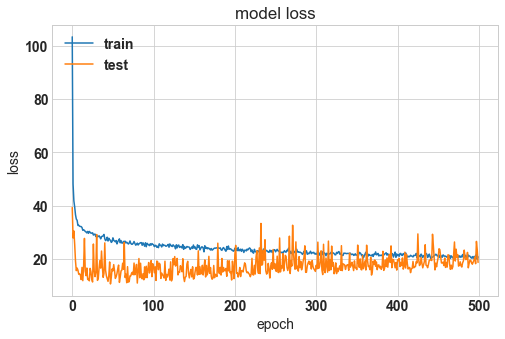

In [453]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [336]:
NN_model_loaded = load_model('nn_models/Weights-048--10.72280.hdf5')
nn_pred = NN_model_loaded.predict(X_val[name_features])

print("Val Set MSE:", mean_squared_error(y_val, nn_pred))
print("Val Set SSE:", math.sqrt(mean_squared_error(y_val, nn_pred)))

Val Set MSE: 4167.441750159008
Val Set SSE: 64.55572592852634


## Hyperparameter Tuning for XGBoost

In [454]:
# A parameter grid for XGBoost
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

model = xg.XGBRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=3)
grid_result = grid.fit(X_train[name_features], y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 405 candidates, totalling 4050 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-2026.135, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-585.333, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-1678.882, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-742.971, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-1648.776, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-2147.955, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-9624.587, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight

[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-895.089, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1902.086, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-2307.958, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-14950.431, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1833

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-535.862, total=   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-1285.776, total=   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-2740.801, total=   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-9261.316, total=   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-19589.789, total=   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_ch

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-1128.116, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-5397.231, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-12220.915, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-16464.170, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-1238.634, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_wei

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-2676.328, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-9332.405, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-20909.688, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-905.607, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-1312.454, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_ch

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-7547.934, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-3960.812, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-2703.041, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-1143.520, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-5816.958, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weigh

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-31290.785, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-1026.784, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-2081.844, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-3536.338, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-725.384, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_ch

[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=-883.842, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=-825.188, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=-2299.111, total=   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=-413.960, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=-1764.281, total=   0.2s
[CV

[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0, score=-1672.981, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=-5003.933, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=-1225.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=-1260.091, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=-780.433, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsamp

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-2856.358, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-265.470, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-2876.821, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-263.644, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-1060.357, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[C

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=-494.499, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=-1203.640, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=-2925.304, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=-13433.221, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=-20877.731, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 

[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, score=-877.054, total=   0.4s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, score=-1059.545, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, score=-8314.121, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, score=-2617.477, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, score=-1911.689, total=   0.4s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[

[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=-13652.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=-18570.110, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=-1701.086, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=-1824.147, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-10120.029, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.

[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=-18838.317, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=-1023.628, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=-1898.821, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-2026.135, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-585.333, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, 

[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=-1853.083, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=-3371.829, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-2762.499, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-947.575, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1822.

[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8, score=-1319.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8, score=-1997.668, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-2396.257, total=   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-620.573, total=   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, sc

[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=-560.605, total=   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-4325.231, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-768.780, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-1655.478, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-647.08

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6, score=-1713.707, total=   0.6s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-4056.126, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-656.730, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-758.146, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-559.573, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-1979.755, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-490.993, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-923.124, total=   0.6s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-282.560, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-770.952, total=   0.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1,

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-797.306, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-1164.238, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-903.607, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-1255.504, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-5094.430, total=   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_chil

[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8, score=-2927.341, total=   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8, score=-478.590, total=   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8, score=-1739.527, total=   0.3s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8, score=-1130.832, total=   0.4s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8, score=-8729.545, total=   0.4s
[

[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=-487.141, total=   0.3s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=-1429.311, total=   0.3s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=-1968.094, total=   0.3s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=-14943.655, total=   0.3s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=-17990.006, total=   0.3s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 

[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6, score=-1199.986, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6, score=-1068.754, total=   0.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6, score=-5799.402, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6, score=-2988.911, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6, score=-1581.265, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6 


[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=-13770.405, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=-18737.329, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=-1075.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=-1065.876, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-8538.444, total=   0.4s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0

[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0, score=-19201.310, total=   0.4s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0, score=-1023.406, total=   0.4s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0, score=-1776.276, total=   0.4s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-2780.360, total=   0.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-550.830, total=   0.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=

[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=-916.969, total=   0.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=-3136.857, total=   0.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=-11033.721, total=   0.7s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=-531.300, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=-1803.750, total=   0.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[

[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, score=-1246.157, total=   1.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=-3360.133, total=   0.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=-781.095, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=-619.699, total=   0.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=-682.146, total=   0.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsampl

[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=-3676.631, total=   0.9s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=-993.775, total=   0.6s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=-1956.948, total=   0.6s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=-967.134, total=   0.8s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=-1818.585, total=   0.6s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[C

[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=-1275.788, total=   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=-1377.472, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=-720.638, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=-1929.737, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=-2612.107, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsam

[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=-1963.750, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=-285.402, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=-1115.374, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=-625.532, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=-6495.788, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[C

[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6, score=-616.252, total=   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6, score=-1482.709, total=   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6, score=-5346.871, total=   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6, score=-9535.836, total=   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6, score=-33912.515, total=   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsa

[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, score=-1043.098, total=   0.7s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, score=-1084.303, total=   0.7s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, score=-8347.371, total=   0.7s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, score=-3590.714, total=   0.7s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, score=-1844.091, total=   0.7s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8 


[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, score=-12298.001, total=   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, score=-19319.889, total=   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, score=-1122.729, total=   0.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, score=-1885.469, total=   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, score=-8514.435, total=   0.6s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-2212.781, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-411.589, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-575.564, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=-916.491, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=-274.447, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1,

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1347.161, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-2357.108, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-3796.010, total=   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-426.008, total=   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-951.148, total=   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-783.656, total=   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-1795.915, total=   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-1512.460, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-340.893, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-456.185, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weigh

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-1280.399, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-9067.449, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-356.138, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-870.655, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-396.874, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-1808.041, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-420.787, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-530.198, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-389.135, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-920.631, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-591.855, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-1592.944, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-549.314, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-1465.845, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-3563.001, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-602.255, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-471.153, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-768.191, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-2266.557, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-8944.075, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child

[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=-223.628, total=   0.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=-529.476, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=-811.373, total=   0.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=-9297.651, total=   0.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=-4856.815, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV

[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=-1845.362, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=-3534.502, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=-10006.514, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=-34893.929, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=-630.051, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subs

[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-1062.782, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-5303.508, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-2992.885, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-569.784, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=-456.466, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[C

[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=-18730.555, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=-781.997, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=-969.157, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=-6126.502, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=-607.302, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=0.

[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, score=-1701.660, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, score=-431.014, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=-415.591, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=-472.297, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=-1576.651, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV

[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-13605.958, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-329.104, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-831.753, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-327.206, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-718.845, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-401.789, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-1921.592, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-391.923, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-1233.061, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-742.633, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-987.850, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-798.448, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-924.767, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1640.894, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-14487.287, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-577.321, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-483.891, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-1181.703, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-1542.387, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-9057.442, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_chil

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-604.511, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-1165.216, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-3282.472, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-14623.601, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-16747.817, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weig

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-1258.930, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-1446.794, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-10927.816, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-24667.415, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-798.782, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_c

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-672.314, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-7495.463, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-2952.730, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-2767.414, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=-607.562, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-8336.125, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-34502.038, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-510.438, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=-1211.448, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-2657.386, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_ch

[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8, score=-3096.589, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8, score=-289.489, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=0.8, score=-556.313, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0, score=-1069.620, total=   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0, score=-315.825, total=   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0 
[CV

[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=-1621.159, total=   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=-4108.244, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=-717.955, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=-1482.395, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=-705.265, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsampl

[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-1665.405, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-259.007, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-1379.685, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-166.985, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-675.209, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV

[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-824.530, total=   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-278.491, total=   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-816.584, total=   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-1999.366, total=   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-13856.845, total=   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[C

[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-324.093, total=   0.7s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-399.924, total=   0.7s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-839.169, total=   0.7s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-6631.677, total=   0.7s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-2609.426, total=   0.7s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV

[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=-4848.021, total=   0.6s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=-13267.665, total=   0.6s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=-19737.233, total=   0.6s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=-1095.930, total=   0.6s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=-883.809, total=   0.6s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 

[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=-11898.129, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=-15726.497, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=-1204.796, total=   0.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=-2279.308, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=-1266.220, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsam

[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=-1315.453, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=-1687.237, total=   0.4s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=-2225.928, total=   0.4s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=-490.333, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=-987.850, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[C

[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=-1759.873, total=   0.4s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=-1762.572, total=   0.3s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=-522.799, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=-577.321, total=   0.4s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=-483.891, total=   0.3s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsampl

[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-5593.002, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-581.594, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-1952.419, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-604.511, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-1165.216, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[C

[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8, score=-620.700, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8, score=-709.489, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8, score=-440.109, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8, score=-1258.930, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8, score=-1446.794, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsampl

[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=-458.953, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=-135.597, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=-313.711, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=-673.172, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=-7533.415, total=   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]

[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, score=-606.692, total=   0.7s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, score=-1565.147, total=   0.8s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, score=-3674.944, total=   1.0s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, score=-8336.125, total=   0.8s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, score=-34502.038, total=   0.7s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsa

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=-603.756, total=   0.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=-987.020, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=-7854.860, total=   0.7s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=-4052.068, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=-300.189, total=   0.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-1383.954, total=   0.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-15575.504, total=   0.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-17674.690, total=   0.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-1297.688, total=   0.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-1749.692, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_wei

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-234.251, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-5009.261, total=   0.7s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-2115.121, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-497.068, total=   0.8s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-748.818, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-14772.805, total=   0.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-19898.591, total=   0.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-825.783, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-1878.864, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, score=-9589.608, total=   0.7s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weig

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-10799.953, total=   0.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-18473.186, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-1410.805, total=   0.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-2634.736, total=   0.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=-588.684, total=   0.8s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_chi

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-19810.350, total=   0.7s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-336.492, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-1664.988, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=-11508.688, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=-204.216, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weigh

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-721.329, total=   0.7s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-1432.140, total=   0.8s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0, score=-1221.210, total=   0.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0, score=-319.662, total=   0.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0, score=-309.363, total=   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child

[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=-453.125, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=-2250.807, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=-646.332, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=-1674.426, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=-524.755, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV

[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=-3423.105, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=-559.473, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=-586.517, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=-493.806, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=-1332.474, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsampl

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0, score=-167.731, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0, score=-1272.538, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0, score=-160.158, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0, score=-465.419, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0, score=-885.384, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=-1114.696, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=-482.334, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=-1072.425, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=-2670.346, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=-8980.524, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsam

[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=-104.985, total=   0.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=-481.071, total=   0.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=-923.229, total=   0.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=-6038.298, total=   0.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=-2668.244, total=   0.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV

[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-2966.283, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-12818.330, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-28210.363, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-853.826, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=-1500.477, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-8790.092, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-1673.139, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-501.858, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=-832.917, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.8, score=-789.147, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-18810.019, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1319.817, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1647.895, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-4268.318, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=-350.475, total=   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weigh

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-17301.705, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-1367.809, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=-1943.054, total=   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-404.158, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6, score=-228.542, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_w

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-786.836, total=   1.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=-1921.635, total=   1.1s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-5485.506, total=   1.0s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-350.244, total=   0.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8, score=-1452.980, total=   1.0s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=-1778.674, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-1576.928, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-374.846, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-438.545, total=   0.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=-298.517, total=   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-5567.569, total=   1.1s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-233.204, total=   1.1s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-2261.837, total=   0.9s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-396.467, total=   0.9s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, score=-627.102, total=   1.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-395.769, total=   0.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-680.127, total=   0.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-207.700, total=   0.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-648.928, total=   0.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=-2428.733, total=   0.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_

[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0, score=-3518.375, total=   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0, score=-314.390, total=   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0, score=-410.255, total=   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0, score=-1160.375, total=   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0, score=-7584.899, total=   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0 
[C

[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=-465.897, total=   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=-1422.015, total=   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=-3553.149, total=   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=-9637.198, total=   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=-32876.143, total=   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsa

[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-724.957, total=   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-734.299, total=   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-4058.288, total=   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-2492.639, total=   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=-1437.420, total=   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[C

[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-13121.791, total=   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-21723.297, total=   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-1532.060, total=   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=-1118.807, total=   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6, score=-2630.005, total=   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=10, subsample=

[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-2197.171, total=   0.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-1075.860, total=   0.8s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=-480.850, total=   0.8s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=-1836.526, total=   0.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=-142.989, total=   0.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[C

[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=-738.654, total=   0.8s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, score=-9747.830, total=   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, score=-283.392, total=   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, score=-542.918, total=   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, score=-346.534, total=   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]

[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=-1097.767, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=-413.049, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=-3668.618, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=-428.470, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=-1146.479, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[C

[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1180.376, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=-507.388, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1105.472, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=-1323.314, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=-13893.482, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 


[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=-550.897, total=   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=-1272.433, total=   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=-1363.733, total=   0.4s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=-9792.393, total=   0.4s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=-17301.705, total=   0.4s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsa

[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-2044.661, total=   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-14883.402, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-18482.877, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-786.836, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=-1921.635, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8 

[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8, score=-9885.381, total=   0.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8, score=-22618.256, total=   0.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8, score=-976.951, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.8, score=-1778.674, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=1.0, score=-1576.928, total=   0.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsa

[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=-2932.261, total=   0.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=-2336.995, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=-591.189, total=   0.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=-5567.569, total=   0.8s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=-233.204, total=   0.8s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[C

[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, score=-772.186, total=   0.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, score=-1184.471, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, score=-1703.963, total=   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, score=-395.769, total=   0.9s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, score=-680.127, total=   0.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsampl

[Parallel(n_jobs=1)]: Done 4050 out of 4050 | elapsed: 33.5min finished


-2964.416827 (3218.113825) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}
-2609.717847 (2612.476477) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}
-2888.445706 (4087.498020) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
-4873.192001 (5492.083150) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}
-4796.216833 (5995.207119) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8}
-4587.865411 (6074.439655) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0}
-6065.532243 (9003.324534) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6}
-4903.667232 (6816.313897) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 

## Validate on Val Set

In [456]:
tuned_model = grid_result.best_estimator_

# transform the validation dataset
predictions = tuned_model.predict(X_val[name_features])
print("Test Set MSE:", mean_squared_error(y_val, predictions))
print("Test Set SSE:", math.sqrt(mean_squared_error(y_val, predictions)))

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_val})
compare.head(20)

Test Set MSE: 912.0884704536218
Test Set SSE: 30.20080248029217


,Prediction,Test Data
5300,340.825500,330.99
21975,279.274506,279.10
2518,287.153351,276.70
16410,627.443359,648.68
830,187.218689,175.70
1835,231.973389,267.37
22907,422.903839,427.28
9086,224.691299,228.96
2779,122.188721,118.26
6518,24.459318,25.63


## Prediction on Test Set

In [ ]:
test_pred = tuned_model.predict(X_test)
print(test_pred)